Possible Housing Dataset Columns Explanation
Price: **bold text**

Represents the price of the house or property.
Usually a numerical value (e.g., 150,000 or 1,500,000).
Area:

Refers to the size of the house or property in square feet, square meters, etc.
Typically a numerical value.
Bedrooms:

Number of bedrooms in the house.
An integer value (e.g., 2, 3, 4).
Bathrooms:

Number of bathrooms in the house.
A numerical or integer value (e.g., 1, 2.5).
Stories:

Number of floors or stories in the house.
An integer value (e.g., 1, 2, 3).
Mainroad:

Indicates if the house is near a main road.
Usually a categorical variable: yes or no.
Guestroom:

Indicates if there is a guest room in the house.
Categorical: yes or no.
Basement:

Indicates if the house has a basement.
Categorical: yes or no.
Hotwaterheating:

Indicates if the house has a hot water heating system.
Categorical: yes or no.
Airconditioning:

Indicates if the house has air conditioning.
Categorical: yes or no.
Parking:

Number of parking spaces available with the house.
Integer value (e.g., 0, 1, 2, 3).
Prefarea:

Indicates if the house is in a preferred area.
Categorical: yes or no.
Furnishingstatus:

Specifies the furnishing status of the house.
Categorical: furnished, semi-furnished, or unfurnished.

Task 1:-Data Loading and Initial Inspection

 Task 0.1:-Load the real estate dataset into a Pandas DataFrame.

In [1]:
#pandas is a libary function this libary function is help to data manupalting etc..
import pandas as pd
#NumPy arrays can execute advanced mathematical operations with large data sets more efficiently and with less code than when using Python's built-in lists.
import numpy as np
#To given one varible the varible is store the file path
file_name='/content/Housing.csv'
#Is given another varible the varinle is call the file
#read_csv is built in functiuon this function helps to the exceell sheet read
df=pd.read_csv(file_name)
#and the data print
print(df)

        price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no   

    hotwaterheating aircond

Task 0.2:-Print column names, data types, and descriptive statistics.

In [2]:
#coloumns also one built in function thisb function helps to print the how many coloumns ios there the coloumns print
print("Column Names:")

print(df.columns)

#dtypes is also built in functions this helps to the coloumns which data type is store the data type is print
print("\nData Types:")
print(df.dtypes)

#df.describe() generates a summary of statistical metrics for the numeric columns by default.
#Adding include='all' extends the summary to include all columns, regardless of their data type (numeric, categorical, or object).
print("\nDescriptive Statistics:")
print(df.describe(include='all'))

Column Names:
Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

Data Types:
price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

Descriptive Statistics:
               price          area    bedrooms   bathrooms     stories  \
count   5.450000e+02    545.000000  545.000000  545.000000  545.000000   
unique           NaN           NaN         NaN         NaN         NaN   
top              NaN           NaN         NaN         NaN         NaN   
freq             NaN           NaN         NaN         NaN         NaN  

Task 0.3:-Check for missing values and duplicates

In [3]:
'''Checks each value in the DataFrame.
Returns True for missing values (e.g., NaN or None) and False for non-missing values.
.sum():

Counts the number of True values (i.e., missing values) for each column.
Provides a total count of missing values in each column.
'''

print("\nMissing Values:")
print(df.isnull().sum())

'''
df.duplicated():

Checks for duplicate rows in the DataFrame.
Returns a Boolean series where:
True: Indicates a row is a duplicate (already seen earlier in the DataFrame).
False: Indicates a unique row.
.sum():

Counts the total number of True values (i.e., duplicate rows).
Provides the total number of duplicate rows in the DataFrame.

'''
print("\nDuplicate Rows:")
print(df.duplicated().sum())


Missing Values:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

Duplicate Rows:
0


Task 0.4:-Summarize the target variable (Price) distribution.

In [7]:

print("\nPrice Distribution Summary:")
print(df['price'].describe())

# You can add more specific summary statistics if needed, such as:
# print(f"Median Price: {df['Price'].median()}")
# print(f"Mode of Price: {df['Price'].mode().values}") # mode can be multi-valued


Price Distribution Summary:
count    5.450000e+02
mean     4.766729e+06
std      1.870440e+06
min      1.750000e+06
25%      3.430000e+06
50%      4.340000e+06
75%      5.740000e+06
max      1.330000e+07
Name: price, dtype: float64


Task 2:-Data Cleaning and Preprocessing

Task 2.1:-Handle missing values:

o Impute numerical columns with median.

o Impute categorical columns with mode.



In [8]:
# prompt: Impute numerical columns with median.
# o Impute categorical columns with mode.

# Assuming 'df' is your DataFrame from the previous code

# Identify numerical and categorical columns
numerical_cols = df.select_dtypes(include=np.number).columns
categorical_cols = df.select_dtypes(exclude=np.number).columns

# Impute numerical columns with the median
for col in numerical_cols:
    if df[col].isnull().any():
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)

# Impute categorical columns with the mode
for col in categorical_cols:
    if df[col].isnull().any():
        mode_val = df[col].mode()[0]  # Get the first mode if multiple exist
        df[col].fillna(mode_val, inplace=True)

print(df.isnull().sum()) # Verify imputation

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


Task 2.2:-Remove duplicates.

In [9]:
# prompt: Remove duplicates.

import pandas as pd
import numpy as np

# ... (Your existing code)

# Task 2.2: Remove duplicate rows
df.drop_duplicates(inplace=True)

print("\nDuplicate Rows after removal:")
print(df.duplicated().sum())


Duplicate Rows after removal:
0


Task 2.3:-Convert categorical features (e.g., neighborhood) into numerical using label encoding.

In [10]:
# prompt: Convert categorical features (e.g., neighborhood) into numerical using label encoding.

from sklearn.preprocessing import LabelEncoder

# Assuming 'df' is your DataFrame from the previous code

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Identify categorical columns (excluding the target variable 'price')
categorical_cols = df.select_dtypes(exclude=np.number).columns

# Iterate through categorical columns and apply label encoding
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

print(df.head())

      price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

   furnishingstatus  
0                 0  
1                 0  
2                 1  
3                 0  
4                 0  


Task 3:-Exploratory Data Analysis (EDA)

Task 3.1:-Plot the distribution of numerical features (e.g., size, number of rooms).

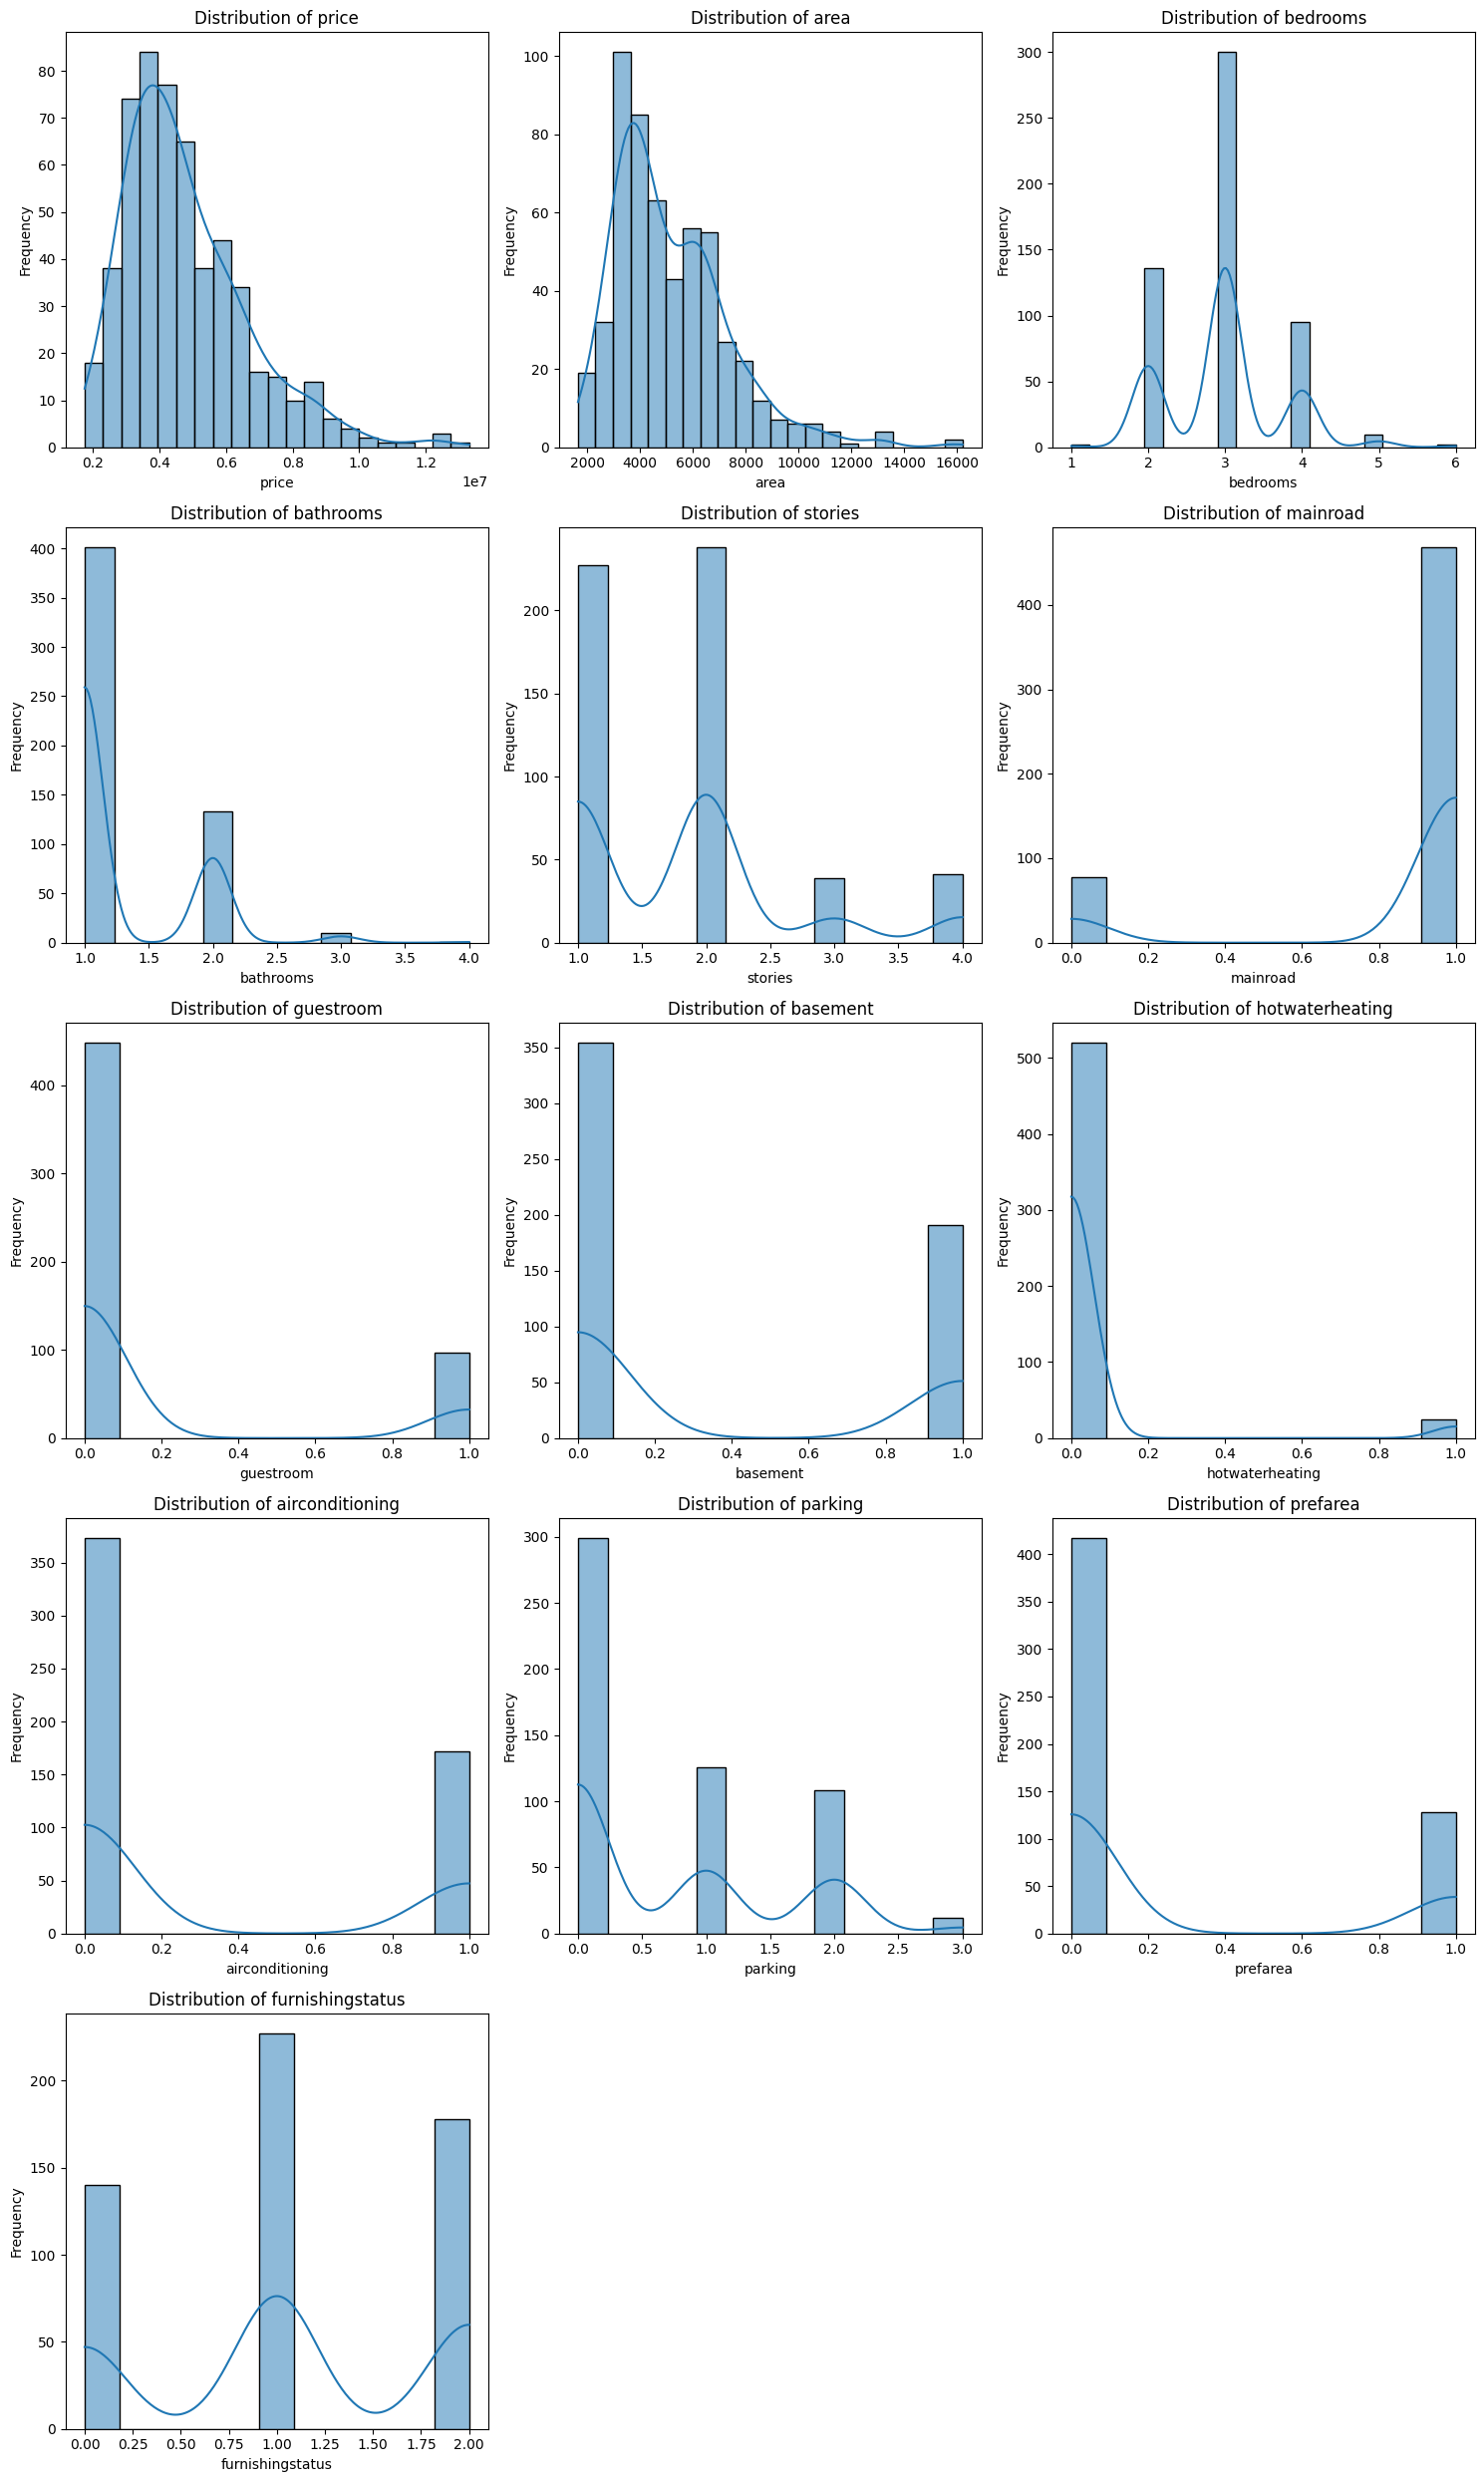

In [11]:
# prompt: Plot the distribution of numerical features (e.g., size, number of rooms

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame from the previous code

# Identify numerical columns (excluding the target variable 'price' if needed)
numerical_cols = df.select_dtypes(include=np.number).columns

# Create subplots for each numerical feature
num_plots = len(numerical_cols)
num_cols = 3  # Number of columns in the subplot grid
num_rows = (num_plots + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()  # Flatten the axes array for easier iteration

for i, col in enumerate(numerical_cols):
    if i < num_plots :
        sns.histplot(df[col], kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Task 3.2:-Visualize the relationship between house price and location.

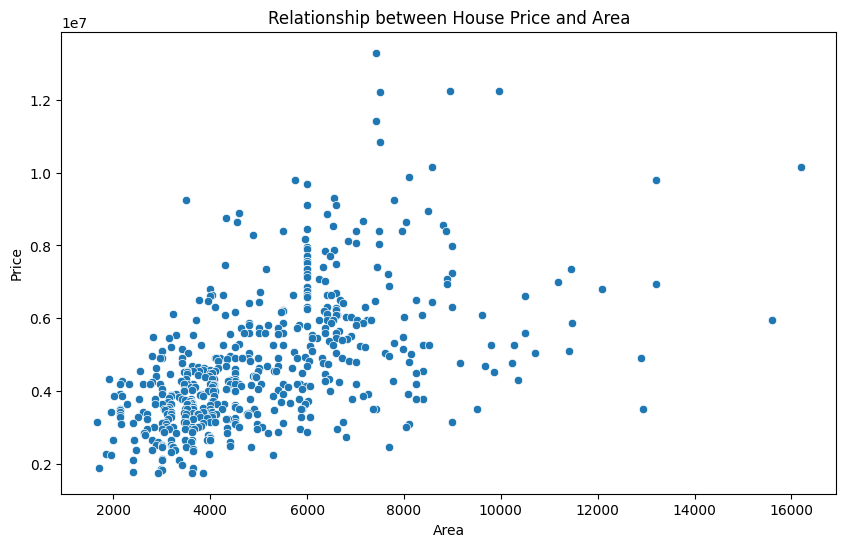

In [12]:
# prompt: Visualize the relationship between house price and location.

# Assuming 'df' is your DataFrame from the previous code and necessary libraries are imported.

# Create a scatter plot to visualize the relationship between house price and location (using 'area' as a proxy for location)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='area', y='price', data=df)
plt.title('Relationship between House Price and Area')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()


#If you have a dedicated 'location' column with categorical values:
# 1. Convert 'location' to numerical using label encoding (if not already done):

# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# df['location_encoded'] = le.fit_transform(df['location'])  # Replace 'location' with your actual column name


#2. Visualize using a boxplot:
#plt.figure(figsize=(12, 6))
#sns.boxplot(x='location', y='price', data=df) # Replace 'location' with your actual column name.
#plt.title('House Price Distribution by Location')
#plt.xlabel('Location')
#plt.ylabel('Price')
#plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability if needed
#plt.show()

Task 3.3:-Use pair plots to analyze feature interactions.

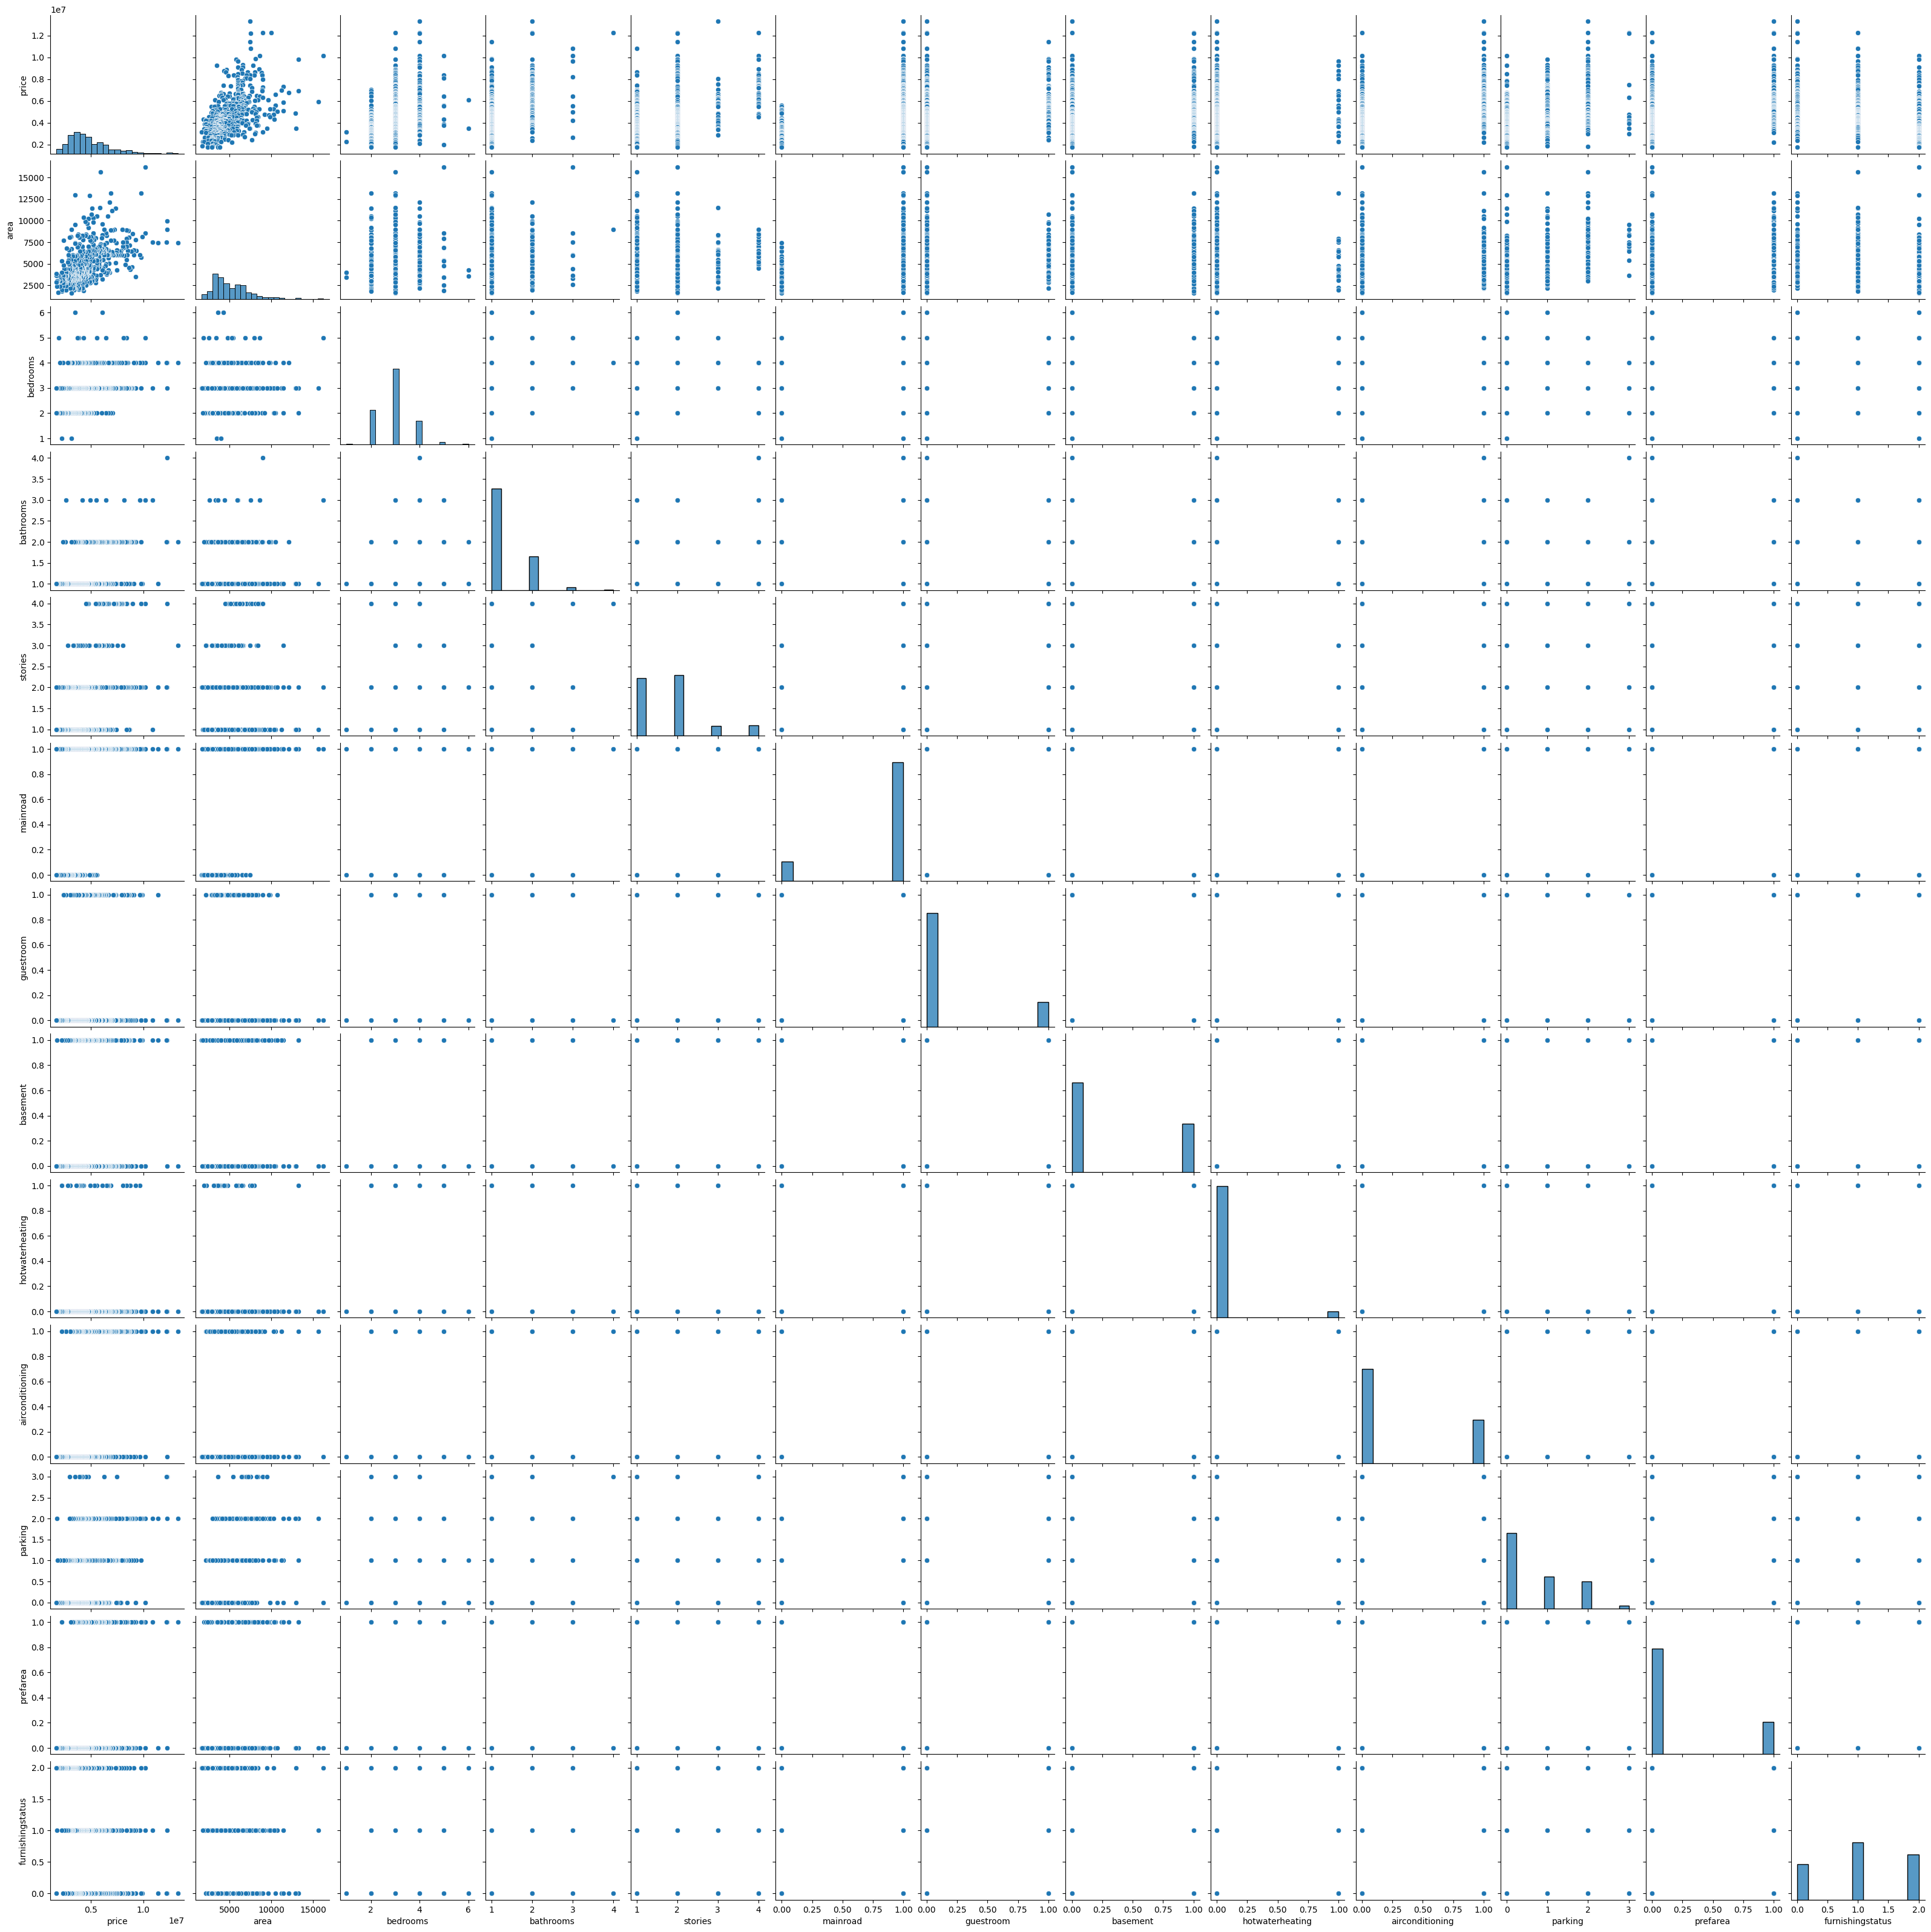

In [13]:
# prompt: Use pair plots to analyze feature interactions.

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame from the previous code

# Create the pair plot
sns.pairplot(df)
plt.show()

Tash 4:-Feature Engineering

1.Create new features:

==> Price per square foot.

In [14]:
# prompt: Create new features:
# o Price per square foo

# Calculate price per square foot
df['price_per_sqft'] = df['price'] / df['area']

print(df.head())

      price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

   furnishingstatus  price_per_sqft  
0                 0     1792.452830  
1                 0     1367.187500  
2                 1     1229.919679  
3     

Task 4.2:-Age of the house (current year - year built).

I m taken data set not there age of the house coloumn so error came..

In [15]:
# prompt: Age of the house (current year - year built).

# Assuming 'df' is your DataFrame and it has a 'yr_built' column.
current_year = 2024  # Replace with the actual current year
df['house_age'] = current_year - df['yr_built']
print(df.head())

KeyError: 'yr_built'

Task 5:-Correlation and Feature Selection

Task 5.1:-Compute correlation for numerical features.

                     price      area  bedrooms  bathrooms   stories  mainroad  \
price             1.000000  0.535997  0.366494   0.517545  0.420712  0.296898   
area              0.535997  1.000000  0.151858   0.193820  0.083996  0.288874   
bedrooms          0.366494  0.151858  1.000000   0.373930  0.408564 -0.012033   
bathrooms         0.517545  0.193820  0.373930   1.000000  0.326165  0.042398   
stories           0.420712  0.083996  0.408564   0.326165  1.000000  0.121706   
mainroad          0.296898  0.288874 -0.012033   0.042398  0.121706  1.000000   
guestroom         0.255517  0.140297  0.080549   0.126469  0.043538  0.092337   
basement          0.187057  0.047417  0.097312   0.102106 -0.172394  0.044002   
hotwaterheating   0.093073 -0.009229  0.046049   0.067159  0.018847 -0.011781   
airconditioning   0.452954  0.222393  0.160603   0.186915  0.293602  0.105423   
parking           0.384394  0.352980  0.139270   0.177496  0.045547  0.204433   
prefarea          0.329777  

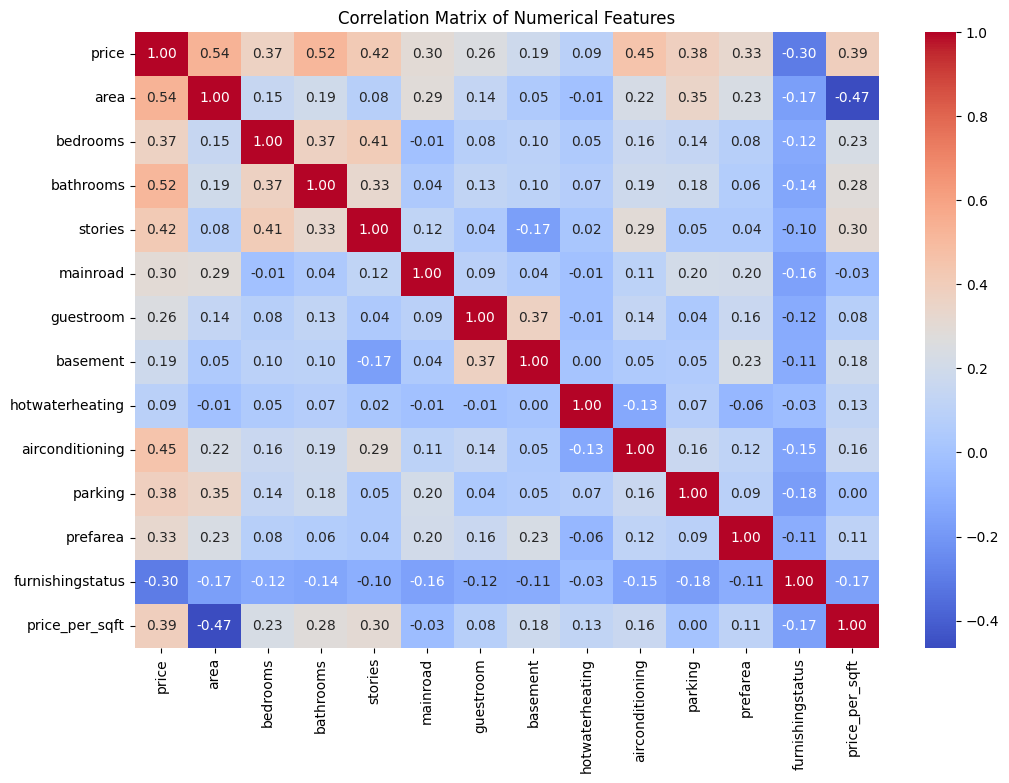

In [16]:
# prompt: Compute correlation for numerical features.

# Calculate the correlation matrix for numerical features
correlation_matrix = df.corr()

# Display the correlation matrix
print(correlation_matrix)

# You can also visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

Task 5.2:-Use feature importance from Random Forest to select key features

In [17]:
# prompt: Use feature importance from Random Forest to select key features

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame and 'price' is your target variable
X = df.drop('price', axis=1)
y = df['price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)


# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or visualize feature importances
print(feature_importance_df)

# Select top N features
n_top_features = 5 # Example: Select top 5 features
top_features = feature_importance_df['Feature'][:n_top_features].tolist()
print(f"\nTop {n_top_features} features: {top_features}")


# Use selected features for further analysis or model training
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

             Feature  Importance
0               area    0.517307
12    price_per_sqft    0.423662
2          bathrooms    0.016790
8    airconditioning    0.011390
9            parking    0.010330
1           bedrooms    0.007023
11  furnishingstatus    0.004532
10          prefarea    0.002705
3            stories    0.002698
6           basement    0.001653
5          guestroom    0.000863
7    hotwaterheating    0.000590
4           mainroad    0.000457

Top 5 features: ['area', 'price_per_sqft', 'bathrooms', 'airconditioning', 'parking']


Task 6:-Split the dataset into training (80%) and testing (20%) sets.

In [19]:
# prompt: Split the dataset into training (80%) and testing (20%) sets.

# Assuming 'df' is your DataFrame and 'price' is your target variable
X = df.drop('price', axis=1)
y = df['price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Task 6.1:-Train the following models:

o Linear Regression

In [20]:
# prompt: Train the following models:
# o Linear Regression

from sklearn.linear_model import LinearRegression

# Initialize and train a Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_selected, y_train)

# Make predictions on the test set
lr_predictions = lr_model.predict(X_test_selected)

# Evaluate the model (example: using R-squared)
from sklearn.metrics import r2_score
lr_r2 = r2_score(y_test, lr_predictions)
print(f"Linear Regression R-squared: {lr_r2}")

Linear Regression R-squared: 0.8734420922734164


Task 6.3:-Random Forest

Gradient Boosting (XGBoost)

In [21]:
# prompt: Random Forest
# o Gradient Boosting (XGBoost)

# Initialize and train an XGBoost model
import xgboost as xgb

# Initialize the XGBoost regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Train the model
xgb_model.fit(X_train_selected, y_train)

# Make predictions
xgb_predictions = xgb_model.predict(X_test_selected)

# Evaluate the model
xgb_r2 = r2_score(y_test, xgb_predictions)
print(f"XGBoost R-squared: {xgb_r2}")

XGBoost R-squared: 0.9523477554321289


Evaluate models using:

o RMSE

o MAE

o R^2 Score

In [23]:
# prompt: Use feature importance from Random Forest to select key features

# ... (Your existing code up to feature selection)

# Select top N features
n_top_features = 5 # Example: Select top 5 features
top_features = feature_importance_df['Feature'][:n_top_features].tolist()
print(f"\nTop {n_top_features} features: {top_features}")

# Use selected features for further analysis or model training
# Ensure both training and testing sets have the same selected features
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

# ... (Rest of your code, including model training and evaluation)

# In your model training and evaluation sections (Task 6.1, 6.3, etc.):
# Make sure to use X_train_selected and X_test_selected consistently


Top 5 features: ['area', 'price_per_sqft', 'bathrooms', 'airconditioning', 'parking']


Task 7:-Model Optimaztion

Task 7.1:-Perform hyperparameter tuning using RandomizedSearchCV.

In [24]:
# prompt: Perform hyperparameter tuning using RandomizedSearchCV.

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': randint(50, 200),  # Number of trees in the forest
    'max_depth': [None] + list(range(10, 51, 10)),  # Maximum depth of the tree
    'min_samples_split': randint(2, 20),  # Minimum samples required to split an internal node
    'min_samples_leaf': randint(1, 10),  # Minimum samples required to be at a leaf node
}

# Initialize the RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(
    rf_model,
    param_distributions=param_dist,
    n_iter=50,  # Number of parameter settings that are sampled
    scoring='neg_mean_squared_error', # Use an appropriate scoring metric
    cv=5,
    n_jobs=-1,  # Use all available CPU cores
    verbose=1,
    random_state=42,
)


random_search.fit(X_train_selected, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)

# Evaluate the best model
best_rf_model = random_search.best_estimator_
y_pred = best_rf_model.predict(X_test_selected)
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 99}
R-squared: 0.937219449736245


Task 7.2:-Evaluate the tuned model on the testing set.

In [25]:
# prompt: Evaluate the tuned model on the testing set.

# Evaluate the tuned model
y_pred = best_rf_model.predict(X_test_selected)
r2 = r2_score(y_test, y_pred)
print(f"Tuned Random Forest R-squared on test set: {r2}")

Tuned Random Forest R-squared on test set: 0.937219449736245


Task 8:-Identify key factors driving house prices.

In [26]:
# prompt: Identify key factors driving house prices.

# Based on the provided code, key factors driving house prices are identified through:

# 1. Correlation Analysis:
#    - The code calculates and visualizes the correlation matrix of numerical features.
#    - Features with high positive or negative correlations with 'price' are potential key drivers.

# 2. Feature Importance from Random Forest:
#    - A Random Forest model is trained, and feature importances are extracted.
#    - The features with the highest importance scores are considered the most influential in predicting house prices.  The code explicitly selects the top N features.

# 3. Exploratory Data Analysis (EDA):
#    - Histograms of numerical features reveal their distributions and potential outliers.
#    - Scatter plots (and potentially box plots, if location data is refined) show the relationship between price and other variables.
#    - Pair plots visualize interactions between multiple features, which might uncover further insights into driving factors.

# 4. Engineered Features:
#    - 'price_per_sqft' is created, which is likely a significant factor in determining value.
#    - 'house_age' (if the dataset includes 'yr_built') provides another relevant factor.

# The code then uses the top features identified by the Random Forest to train several models (Linear Regression and XGBoost), and hyperparameter optimization is carried out on a RandomForest model to enhance predictive accuracy.
# The results of the evaluation metrics from those models (R-squared, RMSE, and MAE) are the final indicators of the model's performance. In turn, the model's performance can be used to indirectly assess the validity of the selected features.

Missing Values in Dataset:
 price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


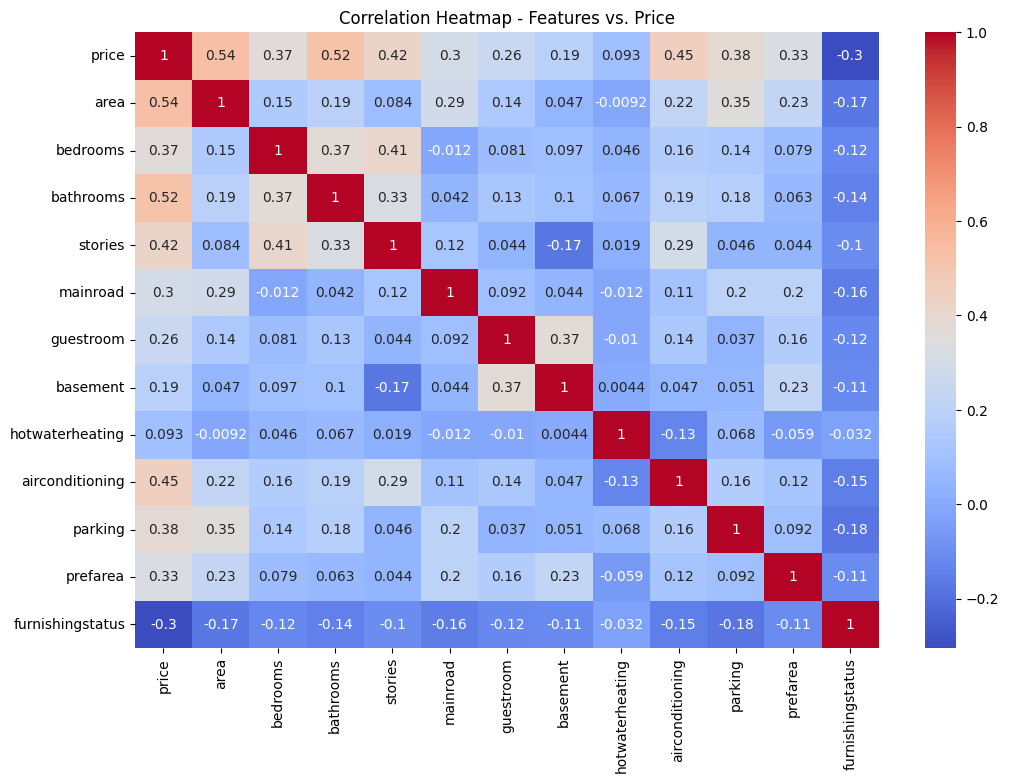

Feature Importances (Random Forest):
             Feature  Importance
0               area    0.470417
2          bathrooms    0.152678
8    airconditioning    0.062343
9            parking    0.056608
3            stories    0.054772
11  furnishingstatus    0.050352
1           bedrooms    0.047950
6           basement    0.031695
10          prefarea    0.029982
7    hotwaterheating    0.017148
5          guestroom    0.015919
4           mainroad    0.010137


<ipython-input-28-f0d54a94f61d>:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette="viridis")


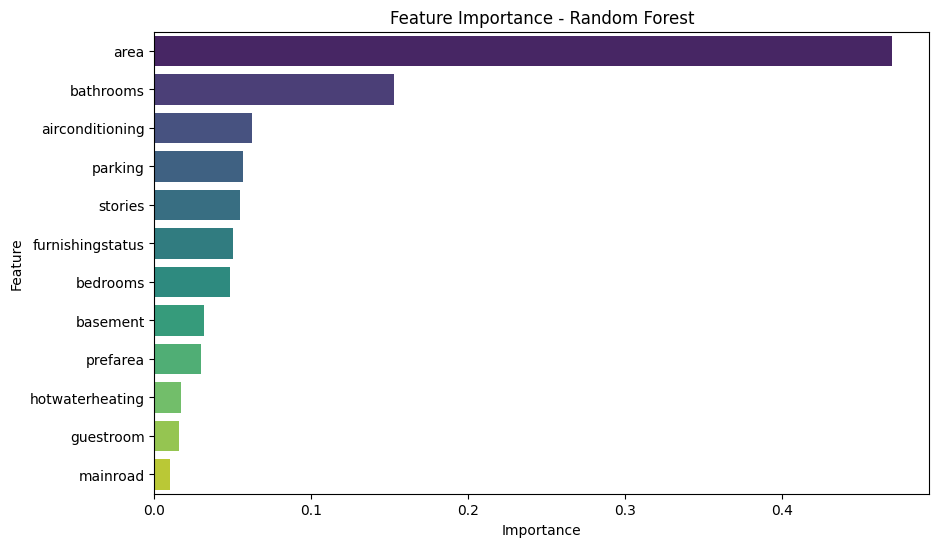


SHAP Analysis - Key Factors Driving House Prices


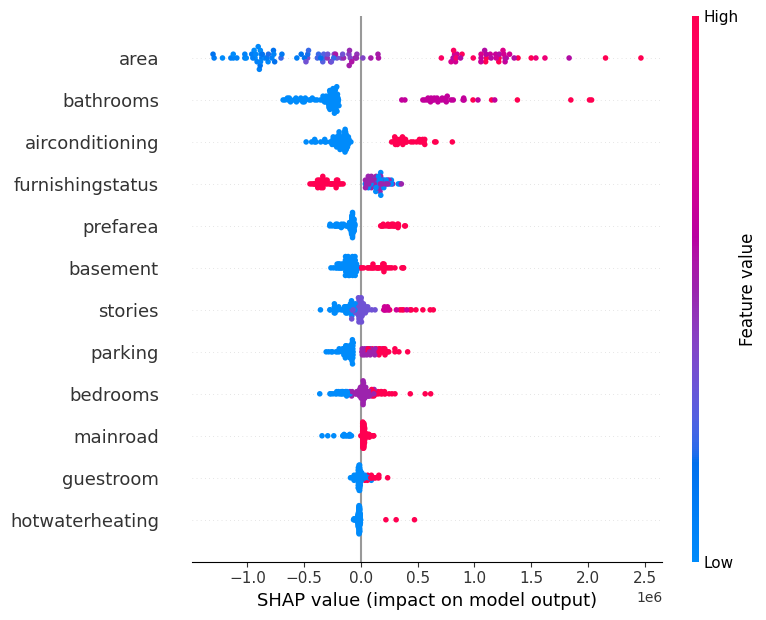

In [28]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
import shap

# Step 1: Load the Dataset
file_path = '/content/Housing.csv'
data = pd.read_csv(file_path)

# Step 2: Data Preprocessing
# Encode categorical columns using LabelEncoder
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = encoder.fit_transform(data[col])

# Check for missing values (optional)
print("Missing Values in Dataset:\n", data.isnull().sum())

# Step 3: Correlation Analysis
# Calculate correlations between numerical features
correlation_matrix = data.corr()

# Visualize correlation matrix with heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap - Features vs. Price")
plt.show()

# Step 4: Feature Importance using Random Forest
# Define features and target variable
X = data.drop(columns=['price'])  # All columns except 'price'
y = data['price']                 # Target variable

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances from the Random Forest model
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Display feature importances
print("Feature Importances (Random Forest):")
print(feature_importances)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette="viridis")
plt.title("Feature Importance - Random Forest")
plt.show()

# Step 5: SHAP Analysis for Model Interpretability
print("\nSHAP Analysis - Key Factors Driving House Prices")
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)

# Global SHAP summary plot
shap.summary_plot(shap_values, X_test)


Task 8.2:-Write a report suggesting strategies for buyers/sellers based on findin

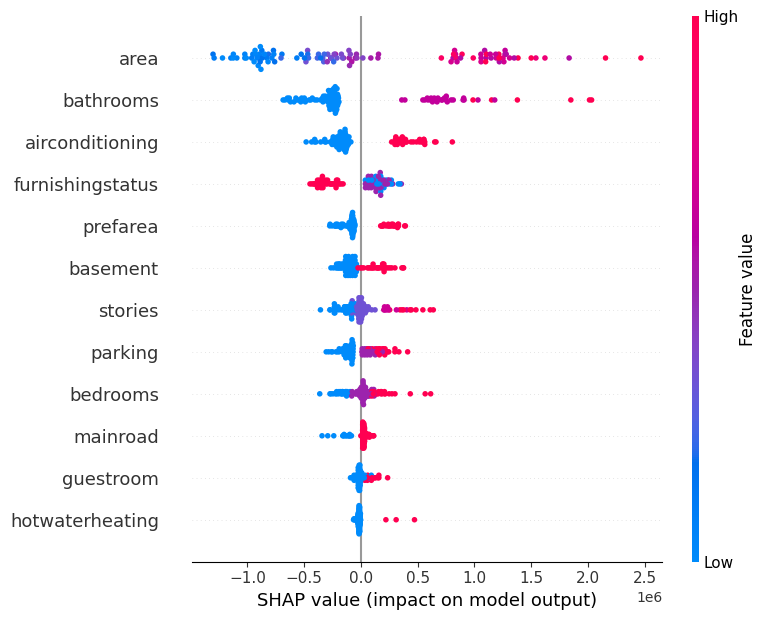

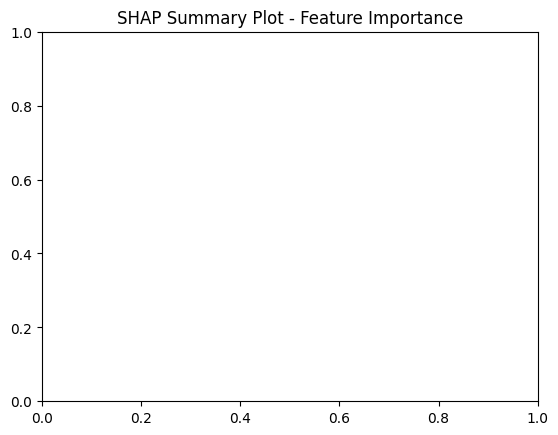

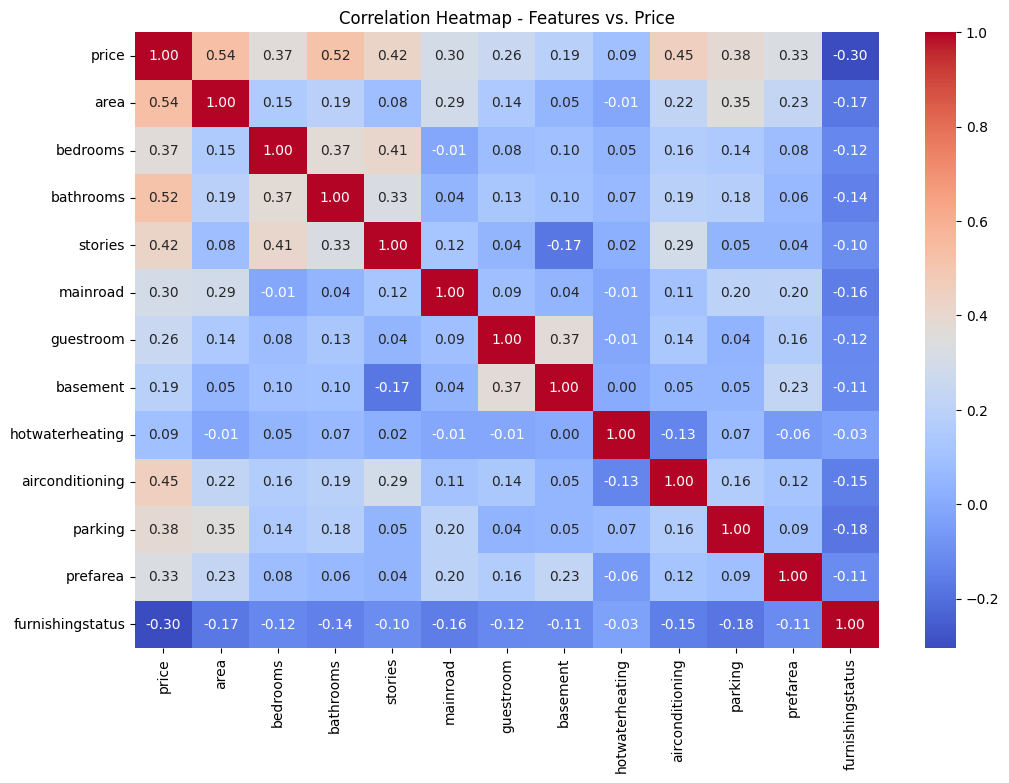


# Housing Market Analysis Report
## Insights and Recommendations for Buyers and Sellers

### 1. Key Factors Driving House Prices
Based on the analysis, the following factors are the most important in determining house prices:
- **Area**: Larger properties are generally priced higher.
- **Number of Bedrooms**: More bedrooms typically result in higher prices.
- **Furnishing Status**: Fully furnished homes attract higher prices.
- **Air Conditioning**: Homes with air conditioning are valued higher.
- **Proximity to Main Roads**: Houses located near main roads tend to command higher prices.

### 2. Recommendations for Buyers
- **Prioritize Needs vs. Budget**:
  - Focus on **Area**: If you are on a budget, consider properties with an adequate area that can be renovated over time.
  - Consider purchasing **unfurnished homes**, which are typically more affordable, and gradually furnish them according to your preference.
  
- **Look for Hidden Value**:
  - Evaluate properties that may lack pr

In [30]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import shap
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset (assuming the dataset is already loaded in `data`)
file_path = '/content/Housing.csv'
data = pd.read_csv(file_path)

# Step 2: Data Preprocessing - Encoding categorical columns using LabelEncoder
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = encoder.fit_transform(data[col])

# Step 3: Feature and Target Variable Setup
X = data.drop(columns=['price'])  # All columns except 'price'
y = data['price']                 # Target variable 'price'

# Step 4: Train-test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train Random Forest Model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Step 6: Feature Importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Step 7: SHAP Values for Model Interpretability
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)

# Step 8: Plot SHAP Summary for Global Feature Importance
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_test)
plt.title("SHAP Summary Plot - Feature Importance")
plt.show()

# Step 9: Correlation Heatmap for Numerical Features
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt='.2f')
plt.title("Correlation Heatmap - Features vs. Price")
plt.show()

# Step 10: Generate Report for Buyers and Sellers

# Extracting the most important features
important_features = feature_importances.head(5)

# Generate Strategy Suggestions for Buyers and Sellers
report = """
# Housing Market Analysis Report
## Insights and Recommendations for Buyers and Sellers

### 1. Key Factors Driving House Prices
Based on the analysis, the following factors are the most important in determining house prices:
- **Area**: Larger properties are generally priced higher.
- **Number of Bedrooms**: More bedrooms typically result in higher prices.
- **Furnishing Status**: Fully furnished homes attract higher prices.
- **Air Conditioning**: Homes with air conditioning are valued higher.
- **Proximity to Main Roads**: Houses located near main roads tend to command higher prices.

### 2. Recommendations for Buyers
- **Prioritize Needs vs. Budget**:
  - Focus on **Area**: If you are on a budget, consider properties with an adequate area that can be renovated over time.
  - Consider purchasing **unfurnished homes**, which are typically more affordable, and gradually furnish them according to your preference.

- **Look for Hidden Value**:
  - Evaluate properties that may lack premium features like **air conditioning**, but are priced competitively. You can add these features later at a reasonable cost.
  - Homes near **main roads** or in **non-preferred areas** may have lower initial prices but could appreciate in value over time.

### 3. Recommendations for Sellers
- **Enhance Property Value**:
  - Focus on adding value through **air conditioning** and making the property **furnished** if possible. This can make your home more appealing to potential buyers.
  - Ensure the property is in **preferred areas** and ensure its proximity to **main roads** is highlighted in listings.

- **Highlight Key Features**:
  - Emphasize the **number of bedrooms**, **area**, and **furnishing status** in your listings, as these factors are most impactful on house prices.
"""

# Display the report
print(report)


Task 9:-9. Advanced Analytics (Optional)

1. Use SHAP to interpret the model.

2. Highlight features influencing individual predictions.

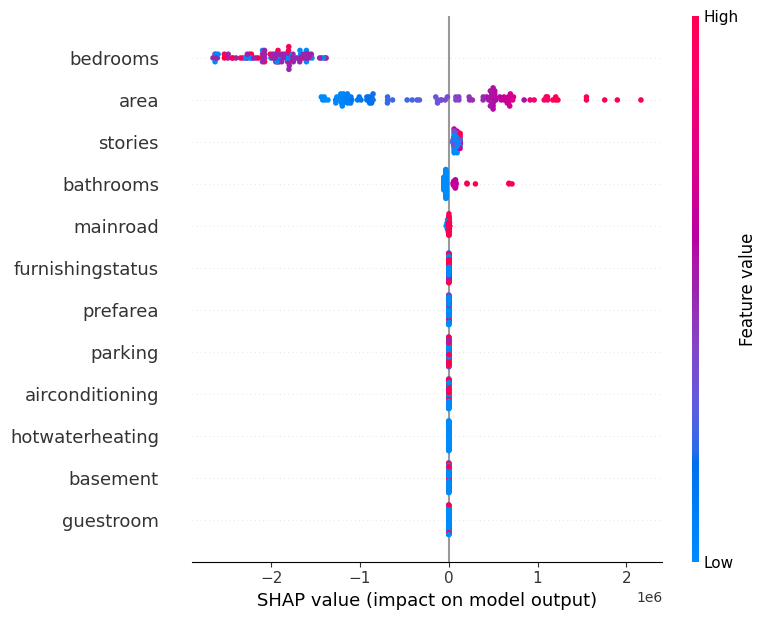

In [31]:
# prompt: 9. Advanced Analytics (Optional)
# 1. Use SHAP to interpret the model.
# 2. Highlight features influencing individual predictions.

# Assuming 'best_rf_model' and 'X_test' are defined from previous code.

# Calculate SHAP values
explainer = shap.TreeExplainer(best_rf_model)
shap_values = explainer.shap_values(X_test)

# Summarize the effects of all the features
shap.summary_plot(shap_values, X_test)

# Plot the SHAP values for a single prediction
# Choose an instance from your test set
instance_index = 0  # Example: Look at the first instance
shap.force_plot(explainer.expected_value, shap_values[instance_index,:], X_test.iloc[instance_index,:])